In [1]:
#Importing all the required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [2]:
#Importing the dataset
#Downloading the dataset, creating dataframe
df = pd.read_csv("Exp_1_2_3_4_5_6_forecasted.csv", parse_dates=['Time'], index_col=['Time'])
df

,Predicted,Actual
Time,,
2022-12-01 00:00:00,18.152537,18.157398
2022-12-01 00:00:01,18.041636,18.156488
2022-12-01 00:00:02,18.162290,18.154502
2022-12-01 00:00:03,18.484913,18.153175
2022-12-01 00:00:04,18.257419,18.124353
...,...,...
2022-12-01 04:34:49,226.342111,230.758438
2022-12-01 04:34:50,228.068812,230.718352
2022-12-01 04:34:51,229.645139,230.565575


In [3]:
#resample the data by grouping them into minutes
ts=df['Predicted'].resample('T').mean()

In [4]:
ts=df['Predicted'].resample('T', label='right').mean()

<AxesSubplot:xlabel='Time'>

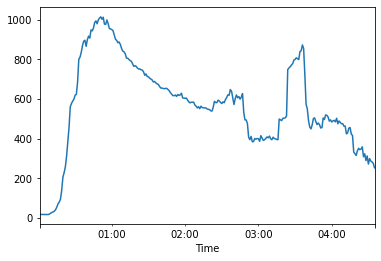

In [5]:
ts.plot()

In [6]:
#train-test split
train=ts[:90]
test=ts[90:]

In [7]:
#Auto ARIMA
stepwise_fit = auto_arima(ts, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2715.130, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2661.942, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2600.740, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2598.698, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2600.315, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2598.997, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=2637.737, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=2600.591, Time=0.08 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 1.848 seconds


In [8]:
#Calculate p-value
adftest=adfuller(ts)
print('pvalue of the adfuller test is: ', adftest[1])

pvalue of the adfuller test is:  0.03696823029303653


In [9]:
#ARIMA building
arima_model=ARIMA(ts, order=(1,2,1))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:              Predicted   No. Observations:                  275
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1296.349
Date:                Thu, 01 Dec 2022   AIC                           2598.698
Time:                        11:40:10   BIC                           2609.526
Sample:                    12-01-2022   HQIC                          2603.045
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1631      0.048      3.368      0.001       0.068       0.258
ma.L1         -0.9009      0.035    -26.012      0.000      -0.969      -0.833
sigma2       775.9951     21.843     35.525      0.0

In [10]:
#Make prediction on the trained model
pred=model.predict(start=len(train), end=(len(ts)-1))


In [11]:
#Claculate errors
mape = np.mean(np.abs(pred - test)/np.abs(test)) # mean absolute percentage error
mae = np.mean(np.abs(pred - test)) # mean absolute error
mpe = np.mean(np.abs(pred - test)/(test)) # mean percentage error
rmse = np.mean((pred - test)**2)**.5 # root mean square error
corr = np.corrcoef(pred, test)[0, 1] # correlation coefficient

mins = np.amin(np.hstack([pred[:, None], test[:, None]]), axis=1)
maxs = np.amax(np.hstack([pred[:, None], test[:, None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)

import pprint
pprint.pprint({'mape' : mape, 'mae' : mae,
               'mpe' : mpe, 'rmse' : rmse,
               'corr' : corr, 'minmax' : minmax})


{'corr': 0.974142307513616,
 'mae': 16.68729990394583,
 'mape': 0.03368374939866201,
 'minmax': 0.032172009647095656,
 'mpe': 0.03368374939866201,
 'rmse': 30.3805467080665}


/Users/adenreleishola/opt/anaconda3/envs/tfs/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/Users/adenreleishola/opt/anaconda3/envs/tfs/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


<AxesSubplot:xlabel='Time'>

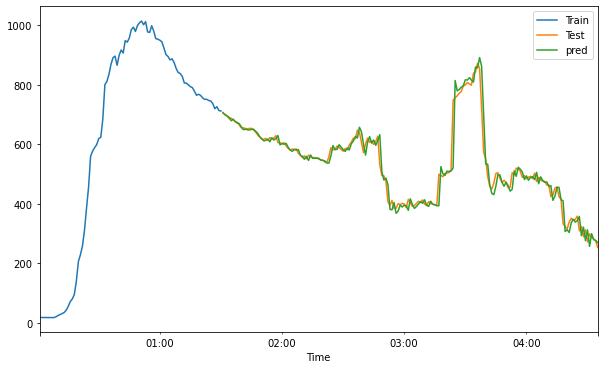

In [12]:
#Visualize predicted values
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='pred')

In [13]:
#predict future data
arima_final=ARIMA(ts, order=(1,2,1))
model_final = arima_final.fit()

In [14]:
#predict the next 40mins from the train dataset
pred_ts=model_final.predict(len(train), len(ts)-1)

<AxesSubplot:xlabel='Time'>

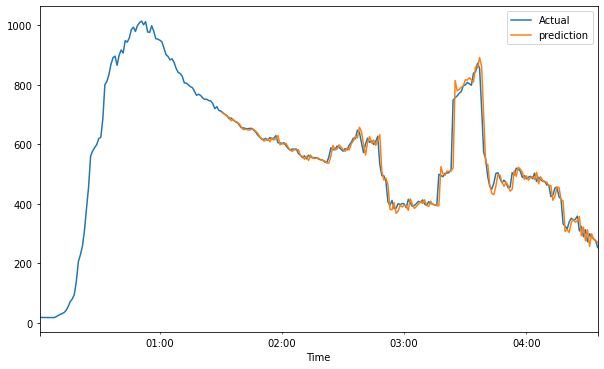

In [15]:
ts.plot(legend=True, label='Actual', figsize=(10,6))
pred_ts.plot(legend=True, label='prediction')

In [16]:
mape = np.mean(np.abs(pred_ts - test)/np.abs(test)) # mean absolute percentage error
mae = np.mean(np.abs(pred_ts - test)) # mean absolute error
mpe = np.mean(np.abs(pred_ts - test)/(test)) # mean percentage error
rmse = np.mean((pred_ts - test)**2)**.5 # root mean square error
corr = np.corrcoef(pred_ts, test)[0, 1] # correlation coefficient

mins = np.amin(np.hstack([pred_ts[:, None], test[:, None]]), axis=1)
maxs = np.amax(np.hstack([pred_ts[:, None], test[:, None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)

import pprint
pprint.pprint({'mape' : mape, 'mae' : mae,
               'mpe' : mpe, 'rmse' : rmse,
               'corr' : corr, 'minmax' : minmax})

{'corr': 0.974142307513616,
 'mae': 16.68729990394583,
 'mape': 0.03368374939866201,
 'minmax': 0.032172009647095656,
 'mpe': 0.03368374939866201,
 'rmse': 30.3805467080665}


/Users/adenreleishola/opt/anaconda3/envs/tfs/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/Users/adenreleishola/opt/anaconda3/envs/tfs/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [25]:
#Downloading the test dataset, creating dataframe
df2 = pd.read_csv("Test_data5.csv", parse_dates=['Time'], index_col=['Time'])

#resample the data by grouping them into minutes
ts1=df2['Predicted'].resample('T').mean()
ts1=df2['Predicted'].resample('T', label='right').mean()

In [26]:
#split dataset
test1=ts1[5:]

act=ts1[6:254]  #test 5
pred_ts1=model_final.predict(6, 253)

<AxesSubplot:xlabel='Time'>

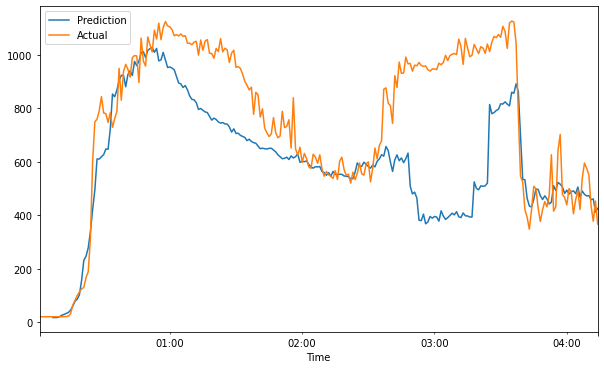

In [27]:
#visualize data
pred_ts1.plot(legend=True, label='Prediction')
ts1.plot(legend=True, label='Actual', figsize=(10,6))


In [28]:
mape = np.mean(np.abs(pred_ts1 - act)/np.abs(test1)) # mean absolute percentage error
mae = np.mean(np.abs(pred_ts1 - act)) # mean absolute error
mpe = np.mean(np.abs(pred_ts1 - act)/(act)) # mean percentage error
rmse = np.mean((pred_ts1- act)**2)**.5 # root mean square error
corr = np.corrcoef(pred_ts1, act)[0, 1] # correlation coefficient

mins = np.amin(np.hstack([pred_ts1[:, None], act[:, None]]), axis=1)
maxs = np.amax(np.hstack([pred_ts1[:, None], act[:, None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)

import pprint
pprint.pprint({'mape' : mape, 'mae' : mae,
               'mpe' : mpe, 'rmse' : rmse,
               'corr' : corr, 'minmax' : minmax})

{'corr': 0.7146045796779545,
 'mae': 179.11918520124235,
 'mape': 0.2163762744241872,
 'minmax': 0.20840377724017034,
 'mpe': 0.2163762744241872,
 'rmse': 256.2225582893984}


/Users/adenreleishola/opt/anaconda3/envs/tfs/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/Users/adenreleishola/opt/anaconda3/envs/tfs/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
